In [23]:
import pandas as pd
# import wget
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [24]:
# Download the data (public github)
# !wget -N https://github.com/fiddler-labs/p2p-lending-data/raw/refs/heads/master/raw_data/accepted_2007_to_2018Q3.csv.gz

In [25]:
df = pd.read_csv('accepted_2007_to_2018Q3.csv.gz')

/var/folders/6s/bfbnxg_x46gfcltpcwwr67200000gn/T/ipykernel_53326/2329708970.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('accepted_2007_to_2018Q3.csv.gz')


In [26]:
pd.set_option('display.max_columns', None)
print(df.columns.tolist())
print(f'Total number of columns: {len(df.columns)}')

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq',

In [27]:
df.groupby(['loan_status']).size()

loan_status
Charged Off                                             254777
Current                                                 822105
Default                                                     32
Does not meet the credit policy. Status:Charged Off        761
Does not meet the credit policy. Status:Fully Paid        1988
Fully Paid                                             1011841
In Grace Period                                          12458
Late (16-30 days)                                         5442
Late (31-120 days)                                       22852
dtype: int64

In [28]:
df = df[df['loan_status'].isin(['Charged Off', 'Fully Paid'])]

In [29]:
df.groupby(['loan_status']).size()

loan_status
Charged Off     254777
Fully Paid     1011841
dtype: int64

**Your code below**

*   Reduce the overall data set to 200K rows or less
*   Split your data for training / testing
*   Build at least two models with `loan_status` as the target
*   Report on the model's performance
*   Report on the model's drivers (feature importance / effects)

Plant 2 flaws in this notebook.  Do not "give away" the answers here.  This notebook should appear, at first glance, to create a viable model.

Make a note of your flaws and be prepared to talk about how the code / results look when they are "fixed".  You will need to talk about those in the final presentation.

In [30]:
import pickle

# Replace 'your_file.pkl' with the path to your pickle file
# file_path = "/Users/jakebrulato/Documents/GitHub/DSBA6010/Final_Project/clean_df_for_eda.pkl"
file_path = '/Users/jakebrulato/Documents/GitHub/DSBA6010/Final_Project/clean_df_5pct_subset.pkl'

# Open the pickle file in read-binary mode
with open(file_path, 'rb') as file:
    data = pickle.load(file)

# The 'data' variable now contains the loaded object
data


,acc_now_delinq,acc_open_past_24mths,addr_state,annual_inc,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,dti,grade,inq_last_6mths,installment,int_rate,issue_d,loan_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,sub_grade,tax_liens,tot_coll_amt,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,total_rev_hi_lim,zip_code,credit_line_age,fully_paid,application_type_Joint App,emp_length_10+ years,emp_length_2-4 years,emp_length_5-9 years,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 60 months,verification_status_Source Verified,verification_status_Verified
185466,0.0,5.0,IL,36000.0,4090.0,5467.0,34.9,0.0,0.0,0.0,0.0,26.90,3,2.0,258.48,0.1953,2016-03-01,7000.0,59.0,64.0,7.0,6.0,0.0,171.0,198.0,120.0,30.0,171.0,1.0,171.0,0.0,2.0,3.0,4.0,4.0,3.0,10.0,12.0,3.0,13.0,0.0,3.0,13.0,100.0,25.0,0.0,0.0,4245.0,0.332,19,0.0,0.0,44990.0,63812.0,15.0,44990.0,8400.0,51027.0,12785.0,605,1947,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
265659,0.0,1.0,NH,78000.0,25267.0,10827.0,54.9,0.0,0.0,0.0,0.0,9.97,0,0.0,373.22,0.0749,2016-01-01,12000.0,100.0,224.0,10.0,10.0,1.0,31.0,198.0,120.0,35.0,31.0,10.0,31.0,0.0,3.0,3.0,5.0,6.0,11.0,6.0,7.0,3.0,8.0,0.0,1.0,8.0,94.4,50.0,0.0,0.0,13173.0,0.513,3,0.0,0.0,176872.0,207871.0,19.0,16696.0,24000.0,15671.0,25700.0,032,6819,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1477946,0.0,4.0,VA,246720.0,84744.0,11381.0,76.4,0.0,0.0,1.0,0.0,9.81,3,0.0,1257.63,0.1756,2013-08-01,35000.0,185.0,173.0,44.0,8.0,11.0,4.0,198.0,120.0,44.0,4.0,10.0,4.0,0.0,4.0,4.0,6.0,9.0,20.0,7.0,11.0,4.0,13.0,0.0,2.0,13.0,97.0,60.0,0.0,0.0,36919.0,0.741,15,0.0,0.0,1016925.0,1062785.0,43.0,147021.0,48300.0,120224.0,49800.0,201,5571,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1603538,0.0,4.0,CA,120000.0,1409.0,26324.0,15.1,0.0,0.0,0.0,0.0,6.73,0,0.0,421.61,0.0532,2015-12-01,14000.0,184.0,193.0,7.0,7.0,0.0,171.0,198.0,120.0,13.0,171.0,13.0,171.0,0.0,4.0,8.0,4.0,7.0,2.0,12.0,18.0,10.0,13.0,0.0,2.0,13.0,100.0,0.0,0.0,0.0,15686.0,0.169,0,0.0,0.0,16909.0,63281.0,20.0,16909.0,38200.0,5281.0,58000.0,941,5874,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
732542,0.0,8.0,TX,113527.0,8284.0,5635.0,78.6,0.0,0.0,0.0,0.0,22.36,2,0.0,651.37,0.1399,2017-03-01,28000.0,106.0,169.0,2.0,2.0,0.0,39.0,198.0,31.0,26.0,171.0,3.0,171.0,0.0,5.0,10.0,5.0,6.0,17.0,10.0,12.0,10.0,17.0,0.0,4.0,17.0,96.6,60.0,6.0,0.0,31842.0,0.722,12,6.0,0.0,140827.0,160039.0,29.0,140827.0,26300.0,115939.0,44100.0,775,5142,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1743728,0.0,6.0,CA,55000.0,29728.0,4750.0,30.0,1.0,1.0,2.0,0.0,27.32,1,2.0,306.04,0.0917,2015-09-01,9600.0,191.0,177.0,4.0,4.0,3.0,14.0,8.0,120.0,11.0,171.0,3.0,57.0,0.0,2.0,9.0,5.0,5.0,8.0,9.0,16.0,6.0,13.0,1.0,3.0,13.0,85.0,0.0,0.0,0.0,29496.0,0.680,6,0.0,970.0,386466.0,559335.0,27.0,52315.0,9500.0,57341.0,44532.0,945,5814,1,0,1,0,0,1,0,0,0,1,0,0,0,

In [31]:
# data.groupby(['fully_paid']).size()
# data = data.sample(n=50000,random_state=42)
# data.to_pickle('50k.pkl')

In [32]:
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

# Preprocessing
# Separate features and target variable
target_column = 'fully_paid'
X = data.drop(columns=[target_column, 'zip_code', 'addr_state', 'issue_d'])
y = data[target_column]

# Step 1: Handle missing values for numerical features
num_features = X.select_dtypes(include=['float64', 'int64']).columns
cat_features = X.select_dtypes(include=['object', 'category', 'uint8']).columns

num_imputer = SimpleImputer(strategy='median')
X[num_features] = num_imputer.fit_transform(X[num_features])

# No imputation needed for one-hot encoded categorical features (already binary)

# Step 2: Remove low variance features
variance_threshold = VarianceThreshold(threshold=0.01)  # Example threshold for low variance
X_low_var = variance_threshold.fit_transform(X)

# Step 3: Feature selection using tree-based importance
# Use a Random Forest to evaluate feature importances
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X, y)

# Get feature importances and sort
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': forest.feature_importances_
}).sort_values(by='importance', ascending=False)

# Select top features based on a threshold or top-k
selected_features = feature_importances[feature_importances['importance'] > 0.01]  # Example threshold

# Filter the dataset to include only selected features
X_selected = X[selected_features['feature']]


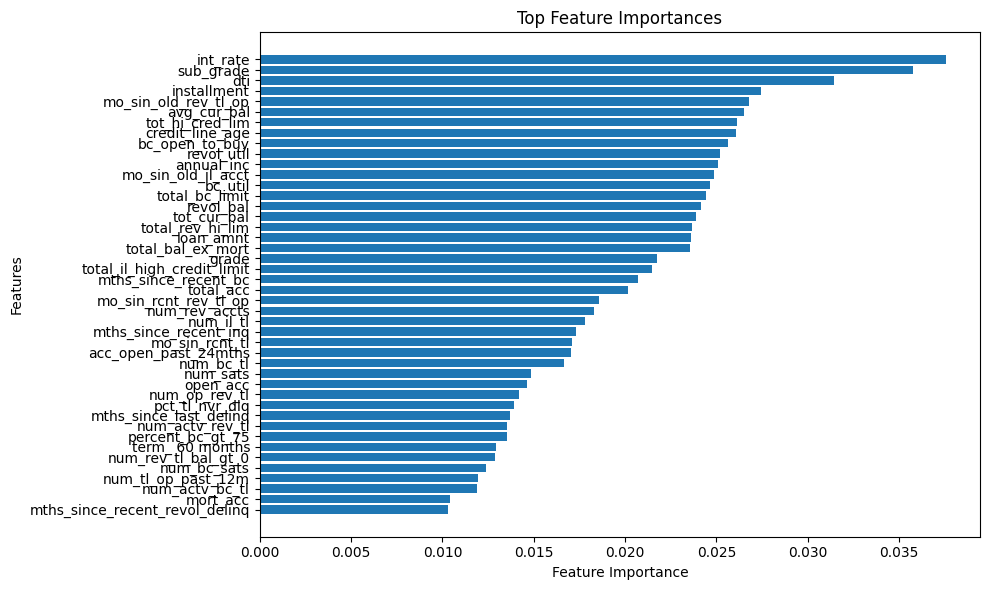

In [33]:
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(selected_features['feature'], selected_features['importance'], align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top Feature Importances')
plt.gca().invert_yaxis()  # Invert axis for better readability
plt.tight_layout()
plt.show()


/Users/jakebrulato/Documents/GitHub/DSBA6010/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest Accuracy: 0.79
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.10      0.16      3673
           1       0.80      0.98      0.88     13716

    accuracy                           0.79     17389
   macro avg       0.66      0.54      0.52     17389
weighted avg       0.74      0.79      0.73     17389

Logistic Regression Accuracy: 0.79
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.00      0.01      3673
           1       0.79      1.00      0.88     13716

    accuracy                           0.79     17389
   macro avg       0.65      0.50      0.44     17389
weighted avg       0.73      0.79      0.70     17389

Top Random Forest Feature Importances:
                Feature  Importance
0              int_rate    0.042635
1             sub_grade    0.037460
2                   dti    0.035234
3           install

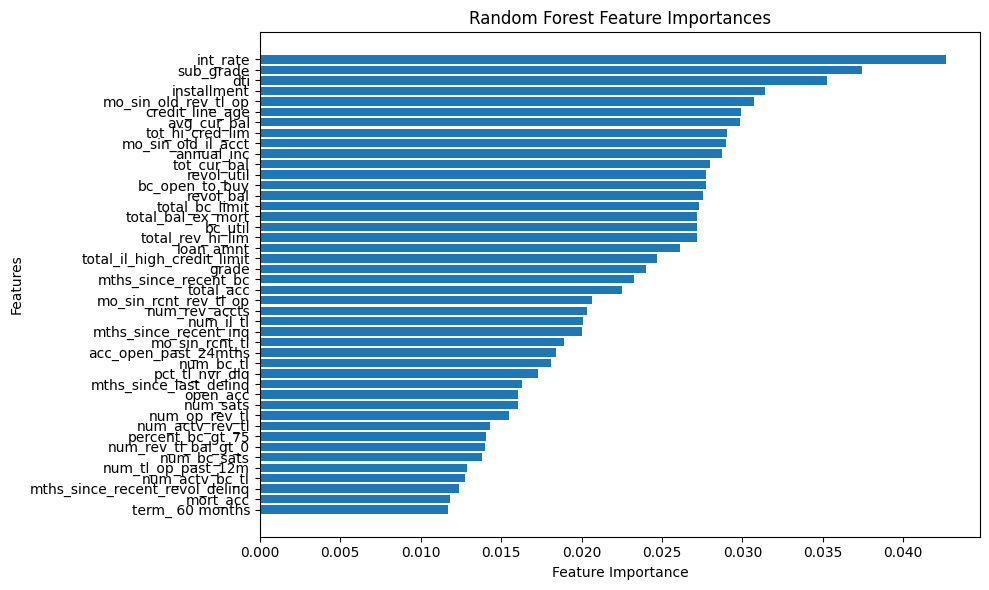

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Ensure reproducibility
random_state = 42

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=random_state)

# Step 2: Train two models
## Model 1: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=random_state)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

## Model 2: Logistic Regression
log_reg_model = LogisticRegression(max_iter=1000, random_state=random_state)
log_reg_model.fit(X_train, y_train)
log_reg_predictions = log_reg_model.predict(X_test)

# Step 3: Evaluate model performance
## Random Forest Metrics
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

## Logistic Regression Metrics
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.2f}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, log_reg_predictions))

# Step 4: Feature importance / effects
## Random Forest Feature Importance
rf_feature_importances = pd.DataFrame({
    'Feature': X_selected.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Top Random Forest Feature Importances:")
print(rf_feature_importances.head())

## Logistic Regression Coefficients
log_reg_coefficients = pd.DataFrame({
    'Feature': X_selected.columns,
    'Coefficient': log_reg_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("Top Logistic Regression Feature Effects:")
print(log_reg_coefficients.head())

# Visualize Random Forest Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(rf_feature_importances['Feature'], rf_feature_importances['Importance'], align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()  # Invert axis for better readability
plt.tight_layout()
plt.show()
